# Holiday HomeWork

## Πανεπιστήμιο Δυτικής Αττικής
## Τμήμα Βιομηχανικής Σχεδίασης και Παραγωγής

# Επιχειρηματική Ευφυΐα και Ανάλυση Μεγάλων Δεδομένων (7009)
### ΝΙΚΟ ΓΚΑΡΡΟ 222017005 

<br>
<br>

### Πρόβλεψη καρδιακής ανεπάρκειας 

**Σκοπός:** είναι να προβλεψούμε μια πιθανή καρδιακή νόσο με βάση ένα σύνολο δεδομένων με 918 παρατηρήσεις και 11 χαρακτηριστήκα. 

Πηγή δεδομένων fedesoriano https://www.kaggle.com/fedesoriano/heart-failure-prediction 

### Γενικό πλαίσιο 

Οι καρδιαγγειακές παθήσεις (CVD) είναι η νούμερο 1 αιτία θανάτου παγκοσμίως, καθώς υπολογίζεται ότι αφαιρούν 17,9 εκατομμύρια ζωές κάθε χρόνο, που ευθύνονται για το 31% όλων των θανάτων παγκοσμίως. Τέσσερις στους 5 θανάτους από καρδιαγγειακά νοσήματα οφείλονται σε καρδιακές προσβολές και εγκεφαλικά επεισόδια και το ένα τρίτο αυτών των θανάτων συμβαίνουν πρόωρα σε άτομα ηλικίας κάτω των 70 ετών. Η καρδιακή ανεπάρκεια είναι ένα κοινό συμβάν που προκαλείται από καρδιαγγειακά νοσήματα και αυτό το σύνολο δεδομένων περιέχει 11 χαρακτηριστικά που μπορούν να χρησιμοποιηθούν για την πρόβλεψη μιας πιθανής καρδιακής νόσου.

Τα άτομα με καρδιαγγειακή νόσο ή που διατρέχουν υψηλό καρδιαγγειακό κίνδυνο (λόγω της παρουσίας ενός ή περισσότερων παραγόντων κινδύνου όπως υπέρταση, διαβήτης, υπερλιπιδαιμία ή ήδη εγκατεστημένη νόσος) χρειάζονται έγκαιρη ανίχνευση και διαχείριση, όπου ένα μοντέλο μηχανικής μάθησης μπορεί να βοηθήσει πολύ.

### Πληροφορίες χαρακτηριστήκων 
- Age : Ηλικία του ασθενούς [years] 
- Sex : Φύλο του ασθενούς [M: Male, F: Female]
- ChestPainType : Τύπος πόνου στο στήθος [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP : Αρτηριακή πίεση σε ηρεμία [mm Hg]
- Cholesterol : Χοληστερόλη ορού [mm/dl]
- FastingBS : Σάκχαρο αίματος νηστείας [1: if FastingBS > 120 mg/dl, 0: otherwise] 
- RestingECG : Αποτελέσματα ηλεκτροκαρδιογραφήματος σε ηρεμία [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR : Μέγιστος καρδιακός ρυθμός [Numeric value between 60 and 202]
- ExerciseAngina : Στηθάγχη που προκαλείται από άσκηση [Y: Yes, N: No]
- Oldpeak : oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

Αποτέλεσμα(Label):
- HeartDisease : Κατηγορία εξόδου [1: καρδιοπάθεια, 0: φυσιολογική] 

# Μελέτη δεδομένων

### Κλήση των απαραίτητων βιβλιόθηκων 

In [2]:
import pandas as pd  # χρήση συντομογραφίας "pd" για ευκολία 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<br>

## Εισαγωγή και μελέτη δεδομένων (data exploration)

#### Εισαγωγή αρχείου δεδομένων τύπου csv

In [3]:
data=pd.read_csv('data/heart.csv')

##### Εμφάνιση διαστάσεων πίνακα γραμμές=δείγματα,στήλες=χαρακτηριστικά

In [4]:
data.shape

(918, 12)

#### Εμφάνιση των 5 πρώτων γραμμών δεδομένων 

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Εμφάνιση όλων των δειγμάτων  

In [6]:
data.head(918)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


##### Εμφάνιση στατιστικών στοιχείων δεδομένων

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
data.describe(include='all')  # με το include='all' εμφανίζονται και οι μη αριθμητικές τιμές

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


##### Εμφάνιση ονομάτος στηλών (χαρακτηριστικών)

In [9]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

##### Εμφάνιση δεικτών, αρίθμηση δειγμάτων

In [10]:
data.index

RangeIndex(start=0, stop=918, step=1)

##### Πληροφορίες για τους τύπους δεδομένων

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### Καταμέτρηση στοιχείων ανά χαρακτηριστικό

In [13]:
data.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

#### Καταγραφή μοναδικών τιμών ανά χαρακτηριστικό

In [14]:
cols = data.columns
for i in cols:
    print(i)
    print(data[i].unique())

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex
['M' 'F']
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312

#### Έλεγχος για τιμές που δεν έχουν καταγραφή

In [15]:
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

#### Καταμέτρηση εγγραφών χωρίς τιμές

In [16]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<br>
<br>

# Γραφήματα με τη βιβλιοθήκη Matplotlib

H  Matplotlib είναι μια βιβλιοθήκη σχεδίασης 2D που παράγει γραφικά ποιότητας δημοσίευσης σε διάφορες μορφές.  Με λίγες γραμμές κώδικα δημιουργεί ιστογράμματα, γραφήματα ισχύος, ραβδογράμματα, γραφήματα διασποράς και άλλα 

#### Γράφημα

Text(0.5, 1.0, 'Grafima Age vs Cholesterol')

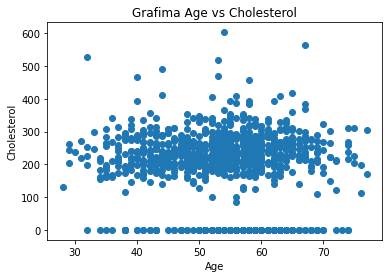

In [17]:
    plt.plot(data.Age,data.Cholesterol,ls ='', marker='o')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.title('Grafima Age vs Cholesterol')

<br>
<br>

### Ιστόγραμμα
Το
ύψος
της
κάθε
στήλης
σχεδιάζεται
με
τέτοιο
τρόπο
ώστε
εμβαδό
της
να
είναι
ίσο
με
την
συχνότητα
της
τιμής
στην
οποία
αναφέρεται

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

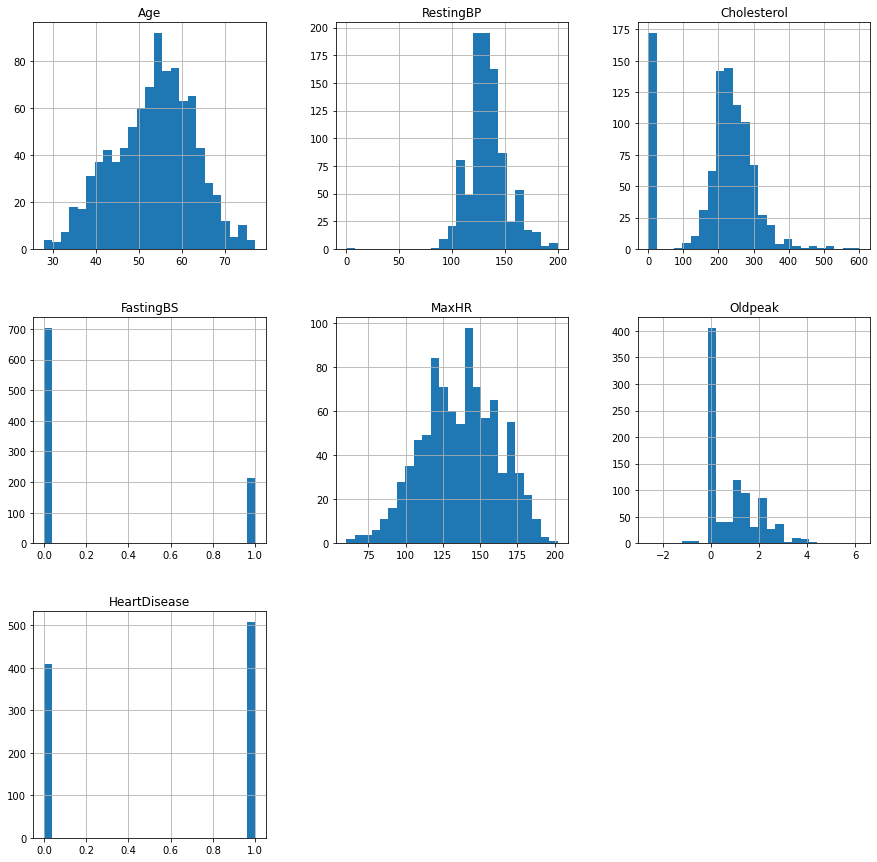

In [18]:
data.hist(bins=25, figsize=(15, 15))

<br>

### Διαγράμματα διασποράς

<AxesSubplot:title={'center':'Διάγραμμα διασποράς των Age και Cholesterol'}, xlabel='Age', ylabel='Cholesterol'>

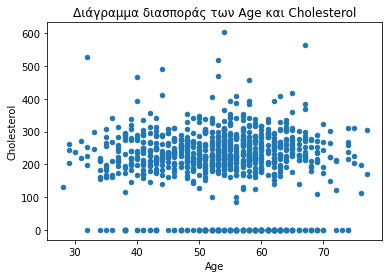

In [19]:
data.plot.scatter(x='Age',y='Cholesterol',title='Διάγραμμα διασποράς των Age και Cholesterol')

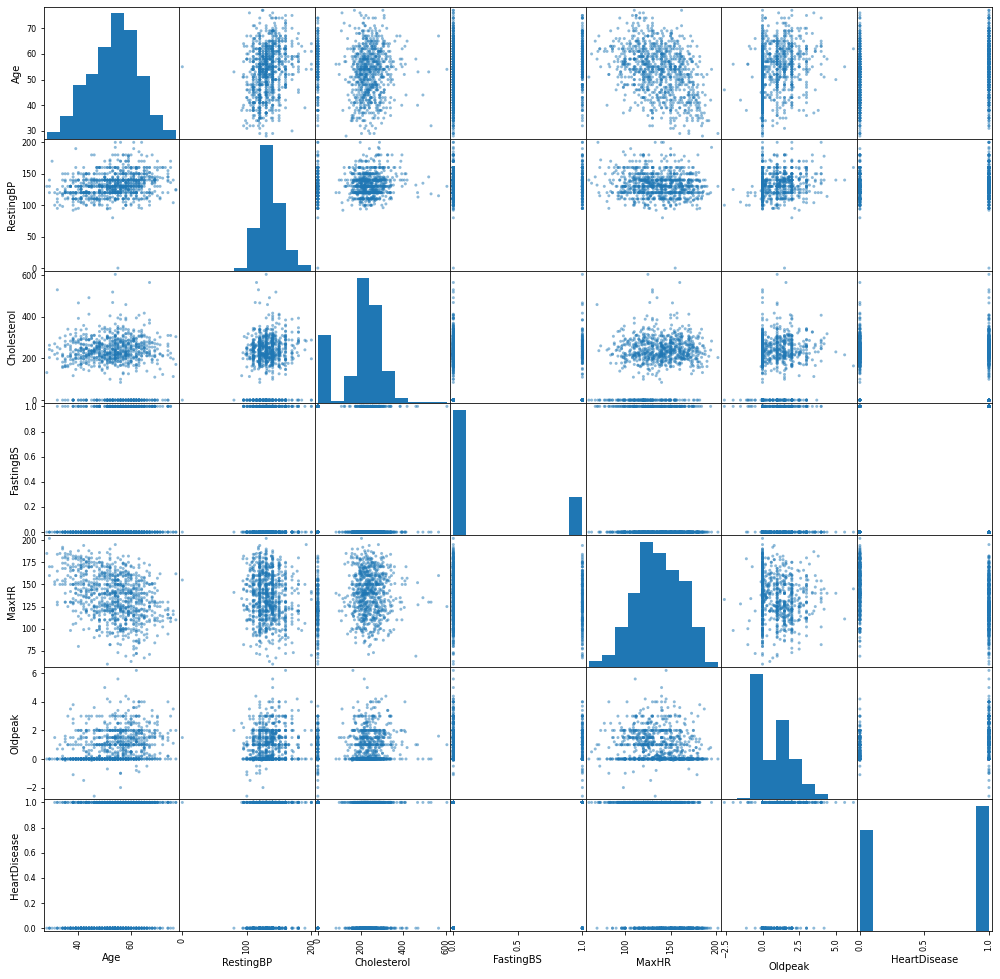

In [20]:
pd.plotting.scatter_matrix(data, figsize=(17, 17),cmap='HeartDisease');

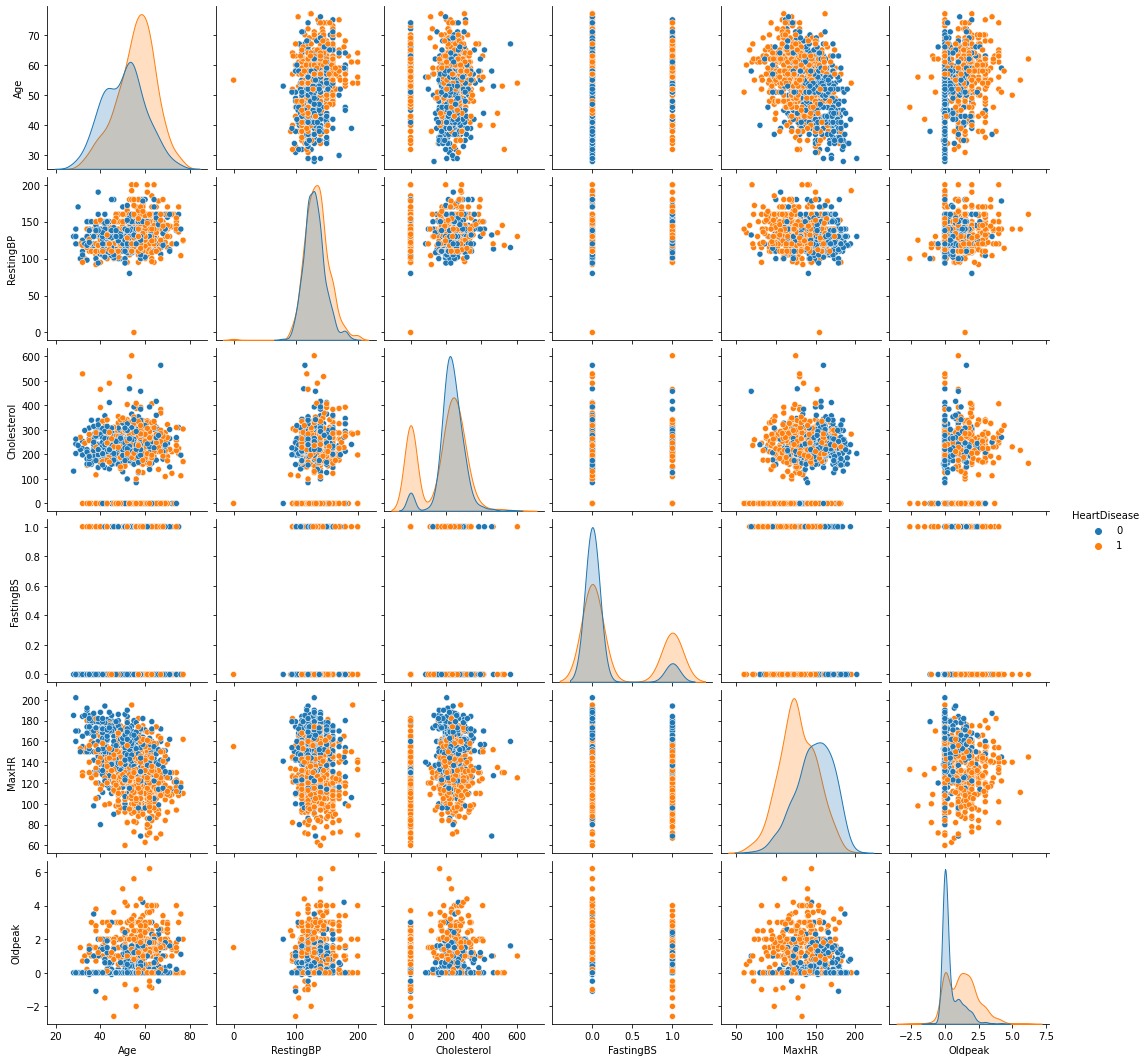

In [21]:
sns.pairplot(data, hue='HeartDisease')  #δίνοντας στην παράμετρο hue την τιμή HeartDisease το γράφημα χρωματίζει τα δεδομένα με βάση τη μεταβλητή HeartDisease

### Πίνακας συσχέτισης για ζευγάρια χαρακτηριστικών 

<AxesSubplot:>

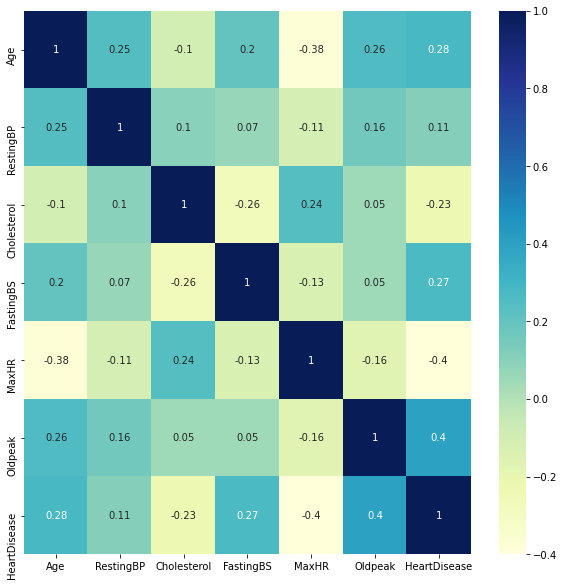

In [22]:
correlation_matrix = data.corr().round(2)
f, ax = plt.subplots(figsize=(10,10))
#### Χρήση απεικόνισης μορφής heatmap της βιβλιοθήκης seaborn 
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

### Αντικατάσταση object τύπο δεδομένων σε int 

Αύτο γίνεται για να μπορουν να αξιοπηθούν πιο πολλά δεδομένα από τα μοντέλα

In [23]:
data['Sex'] = data.Sex.replace(['F','M'],[0,1])

In [24]:
data = data.astype({"Sex": int})

In [25]:
data['ChestPainType'] = data.ChestPainType.replace(['TA','ATA','NAP','ASY'],[1,2,3,4])

In [26]:
data = data.astype({"ChestPainType": int})

In [27]:
data['RestingECG'] = data.RestingECG.replace(['Normal','ST','LVH'],[0,1,2])

In [28]:
data = data.astype({"RestingECG": int})

In [29]:
data['ExerciseAngina'] = data.ExerciseAngina.replace(['Y','N'],[1,0])

In [30]:
data = data.astype({"ExerciseAngina": int})

In [31]:
data['ST_Slope'] = data.ST_Slope.replace(['Up','Flat','Down'],[1,2,3])

In [32]:
data = data.astype({"ST_Slope": int})

In [33]:
data.dtypes

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int32
MaxHR               int64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object

In [34]:
data.head(918)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1


<br>
<br>

### Ιστόγραμμα
Το
ύψος
της
κάθε
στήλης
σχεδιάζεται
με
τέτοιο
τρόπο
ώστε
εμβαδό
της
να
είναι
ίσο
με
την
συχνότητα
της
τιμής
στην
οποία
αναφέρεται

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'ChestPainType'}>],
       [<AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FastingBS'}>],
       [<AxesSubplot:title={'center':'RestingECG'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'ExerciseAngina'}>],
       [<AxesSubplot:title={'center':'Oldpeak'}>,
        <AxesSubplot:title={'center':'ST_Slope'}>,
        <AxesSubplot:title={'center':'HeartDisease'}>]], dtype=object)

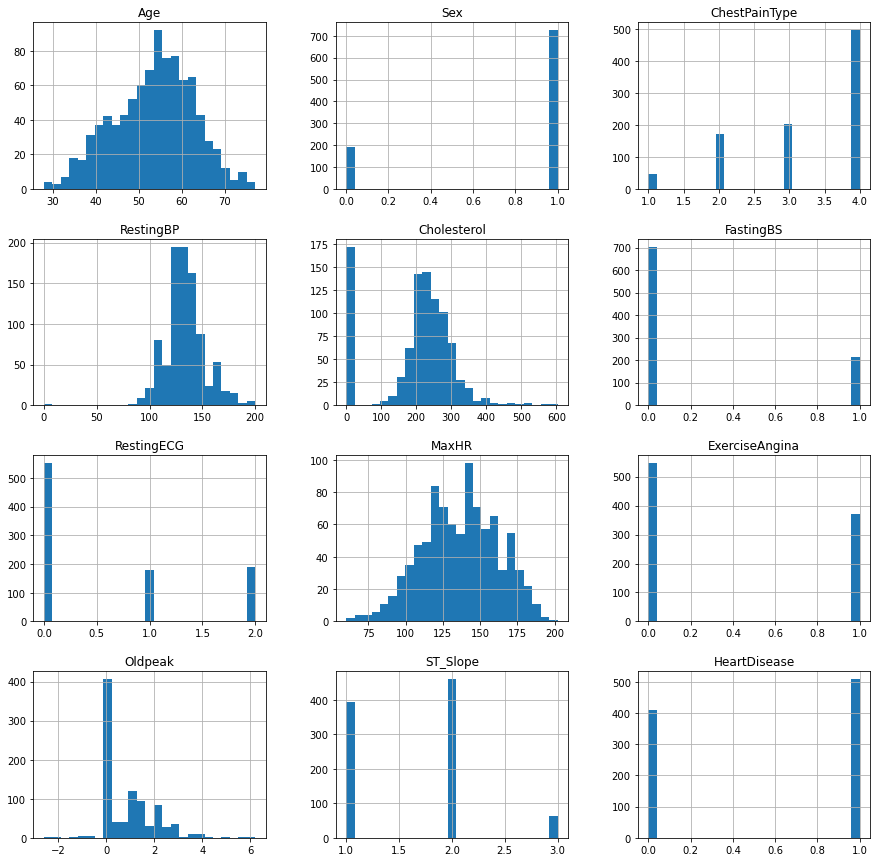

In [35]:
data.hist(bins=25, figsize=(15, 15))

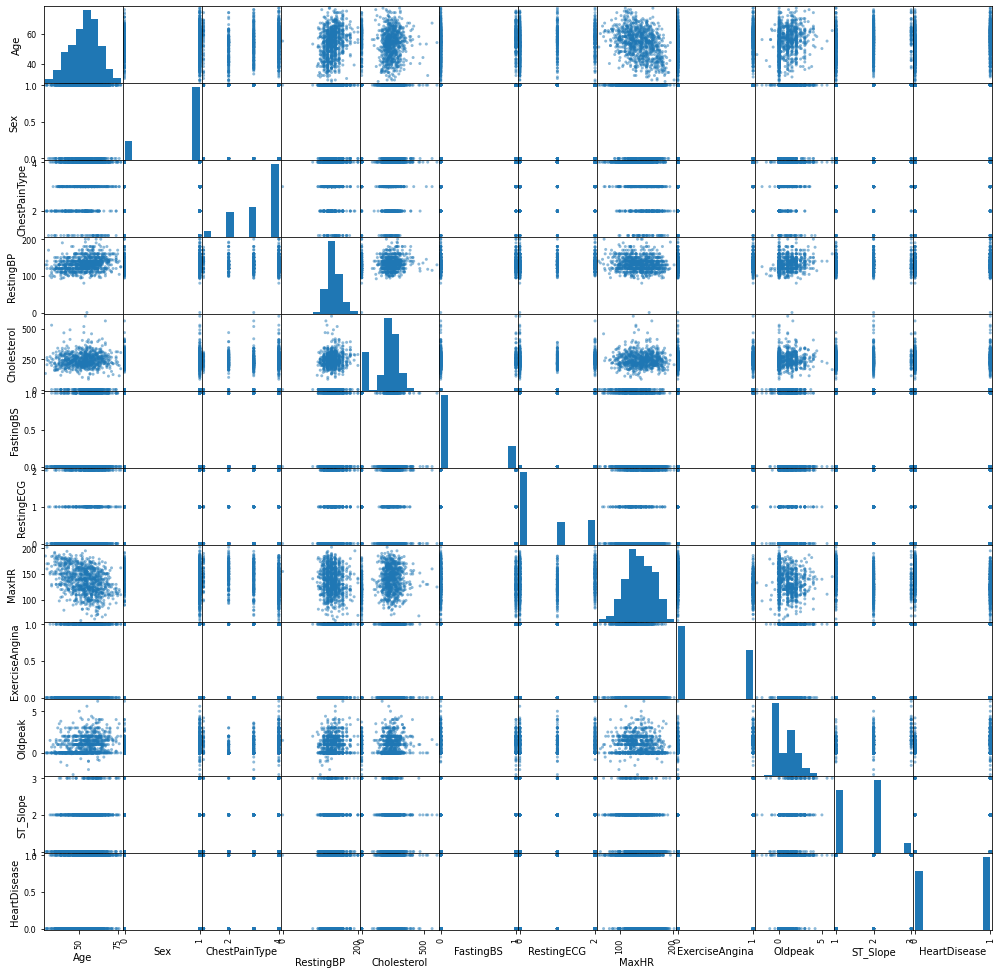

In [36]:
pd.plotting.scatter_matrix(data, figsize=(17, 17),cmap='HeartDisease');

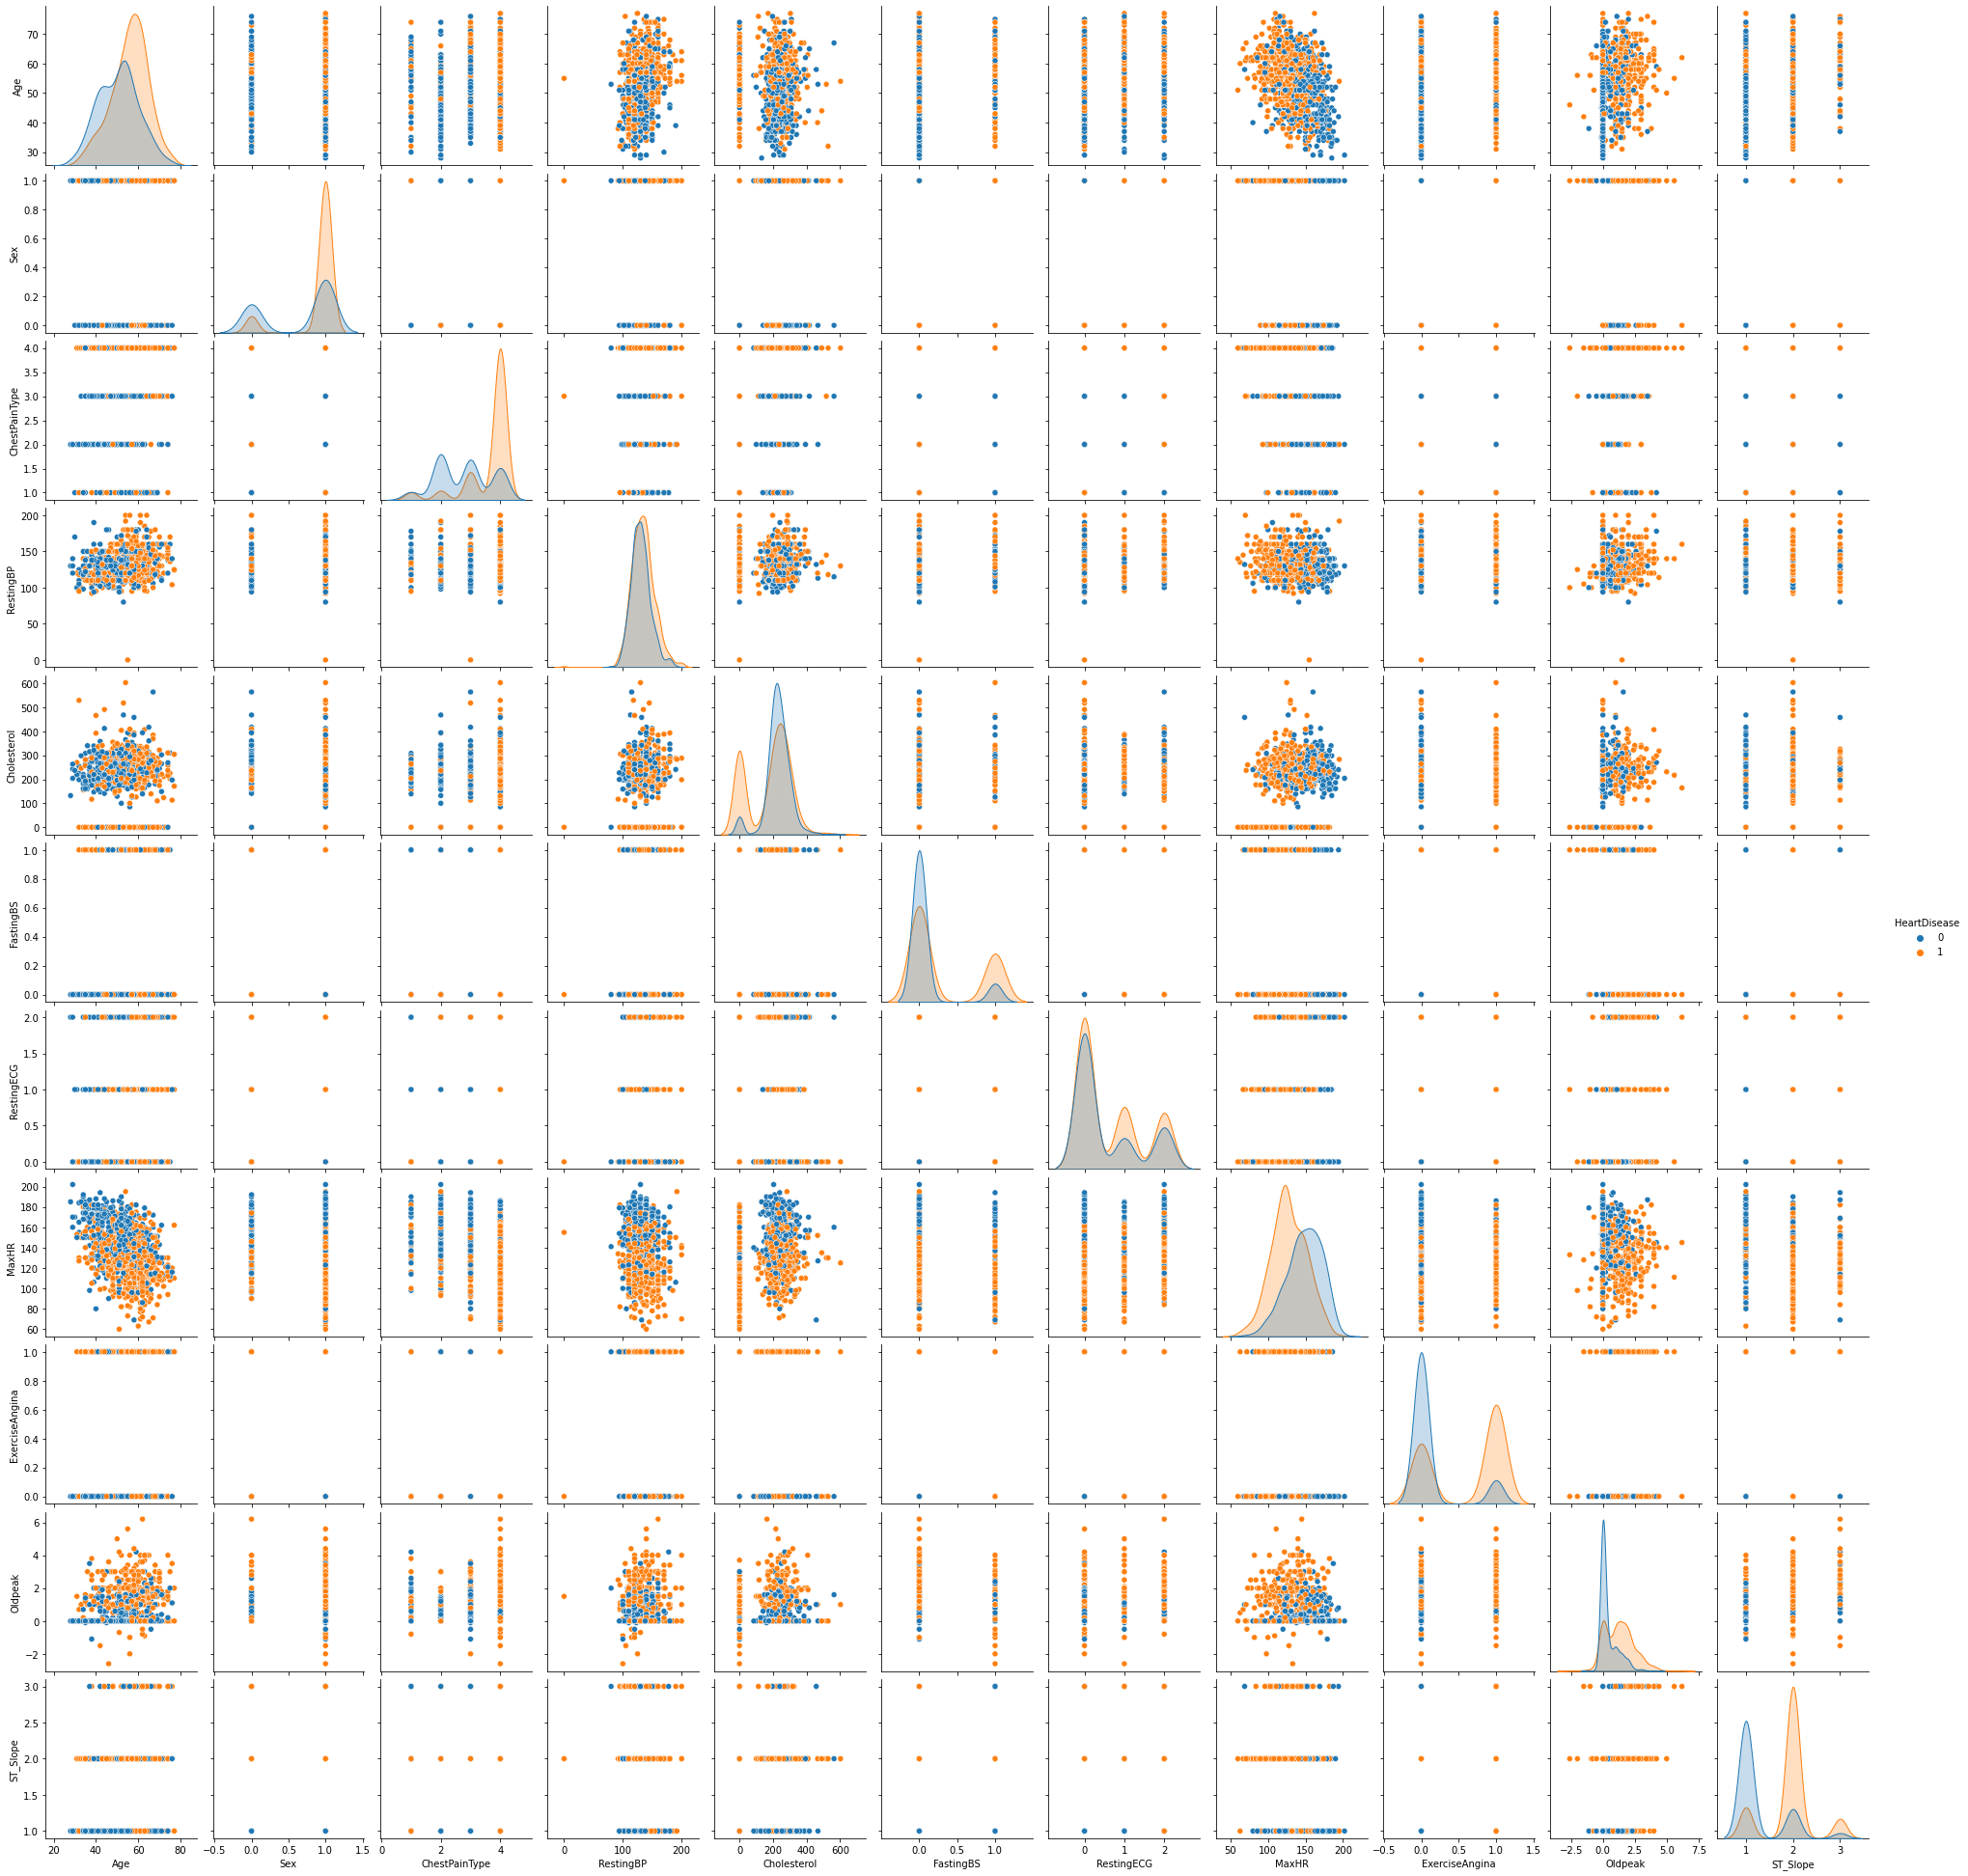

In [37]:
sns.pairplot(data, hue='HeartDisease')  #δίνοντας στην παράμετρο hue την τιμή HeartDisease το γράφημα χρωματίζει τα δεδομένα με βάση τη μεταβλητή HeartDisease

<br>
<br>
<br>

# Διαχωρισμός σε δεδομένα εκπαίδευσης και δεδομένα ελέγχου

Δηλώστε στη μεταβλητή `Χ` τα χαρακτηριστικά που θα χρησιμοποιηθούν ως είσοδοι στο μοντέλο και στη μεταβλητή `y` τη στήλη με τις ετικέτες (μέσα πρόβλεψης) για κάθε δείγμα ως έξοδο του μοντέλου.

In [38]:
X=data[['Age', 'Sex', 'ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


In [39]:
X.shape

(918, 11)

In [40]:
y=data['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [41]:
y.shape

(918,)

Χρησιμοποιούμε το εργαλείο της βιβλιοθήκης Scikit-learn ``train_test_split`` για να μοιράσουμε τα δεδομένα σε εκπαίδευσης και δεδομένα ελέγχου 

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=19)

In [43]:
print("X_train διαστάσεις:", X_train.shape)
print("y_train διαστάσεις:", y_train.shape)

print("X_test διαστάσεις:", X_test.shape)
print("y_test διαστάσεις:", y_test.shape)

X_train διαστάσεις: (642, 11)
y_train διαστάσεις: (642,)
X_test διαστάσεις: (276, 11)
y_test διαστάσεις: (276,)


In [44]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
213,56,0,3,130,219,0,1,164,0,0.0,1
546,48,1,3,132,220,1,1,162,0,0.0,2
334,51,1,4,130,0,1,0,170,0,-0.7,1
652,59,1,1,160,273,0,2,125,0,0.0,1
443,60,1,4,130,186,1,1,140,1,0.5,2
...,...,...,...,...,...,...,...,...,...,...,...
19,36,1,2,120,267,0,0,160,0,3.0,2
354,55,1,4,120,0,0,1,92,0,0.3,1
757,50,1,3,140,233,0,0,163,0,0.6,2
622,59,1,4,110,239,0,2,142,1,1.2,2


<br>
<br>
<br>

# Εκπαίδευση μοντέλου κατηγοριοποίησης  DT

Στη βιβλιοθήκη **scikit-learn**, ένα μοντέλο (estimator-εκτιμητής) για ταξινόμηση (classification) είναι ένα αντικείμενο της Python που εφαρμόζει τις μεθόδους
- `fit(X, y)` για την εκπαίδευση του μοντέλου για δεδομένα εκπαίδευσης εισόδου `Χ` και εξόδου `y` (εδώ X_train, y_train)
- `predict(y_test)` για χρήση του εκπαιδευμένου μοντέλου για ταξινόμηση με είσοδο δεδομένα ελέγχου (y_test) που δεν χρησιμοποιήθηκαν στην εκπαίδευση του μοντέλου

Ακολουθούν τα βήματα που ακολουθούνται για την ανάπτυξη του μοντέλου

### 1. Εισαγωγή βιβλιοθήκης οικογένειας αλγορίθμων DT 
(Εισαγωγή κλάσης από τη βιβλιοθήκη scikit-learn)

In [2]:
from sklearn import tree

### 2. Ορισμός μοντέλου, επιλογή συγκεκριμένου αλγόριθμου μάθησης και παραμέτρων (hyperparameters)
(Δημιουργία αντικειμένου ως στιγμιότυπο της κλάσης)

In [4]:
dtree = tree.DecisionTreeClassifier("entropy")

### 3. Εκπαίδευση μοντέλου

In [47]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### 4. Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου


Έξοδος εκπαιδευμένου μοντέλου με είσοδο τα δεδομένα ελέγχου (test)

In [48]:
y_pred = dtree.predict(X_test)

In [49]:
type(y_pred)

numpy.ndarray

Συγκριση πραγματικών εξόδων από τα δεδομένα κ εκτιμώμενων εξόδων από το μοντέλο με είσοδο τα δεδομένα ελέγχου(test)

In [50]:
print("Ποσοστό επιτυχίας κατηγοριοποίησης:")
print(np.sum(y_pred == y_test) / float(len(y_test)))

Ποσοστό επιτυχίας κατηγοριοποίησης:
0.7644927536231884


### Οπτικοποίηση Δέντρου Απόφασης

[Text(2217.9649390243903, 5254.8, 'X[10] <= 1.5\nentropy = 0.995\nsamples = 642\nvalue = [294, 348]'),
 Text(782.560975609756, 4892.4, 'X[4] <= 50.0\nentropy = 0.649\nsamples = 277\nvalue = [231, 46]'),
 Text(204.14634146341461, 4530.0, 'X[5] <= 0.5\nentropy = 0.857\nsamples = 32\nvalue = [9, 23]'),
 Text(136.09756097560975, 4167.6, 'X[7] <= 102.5\nentropy = 1.0\nsamples = 18\nvalue = [9, 9]'),
 Text(68.04878048780488, 3805.2, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(204.14634146341461, 3805.2, 'X[7] <= 119.0\nentropy = 0.971\nsamples = 15\nvalue = [9, 6]'),
 Text(136.09756097560975, 3442.8, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(272.1951219512195, 3442.8, 'X[6] <= 0.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(136.09756097560975, 3080.4, 'X[7] <= 127.0\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(68.04878048780488, 2718.0, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(204.14634146341461, 2718.0, 'entropy = 0.0\nsamples = 4\nvalue

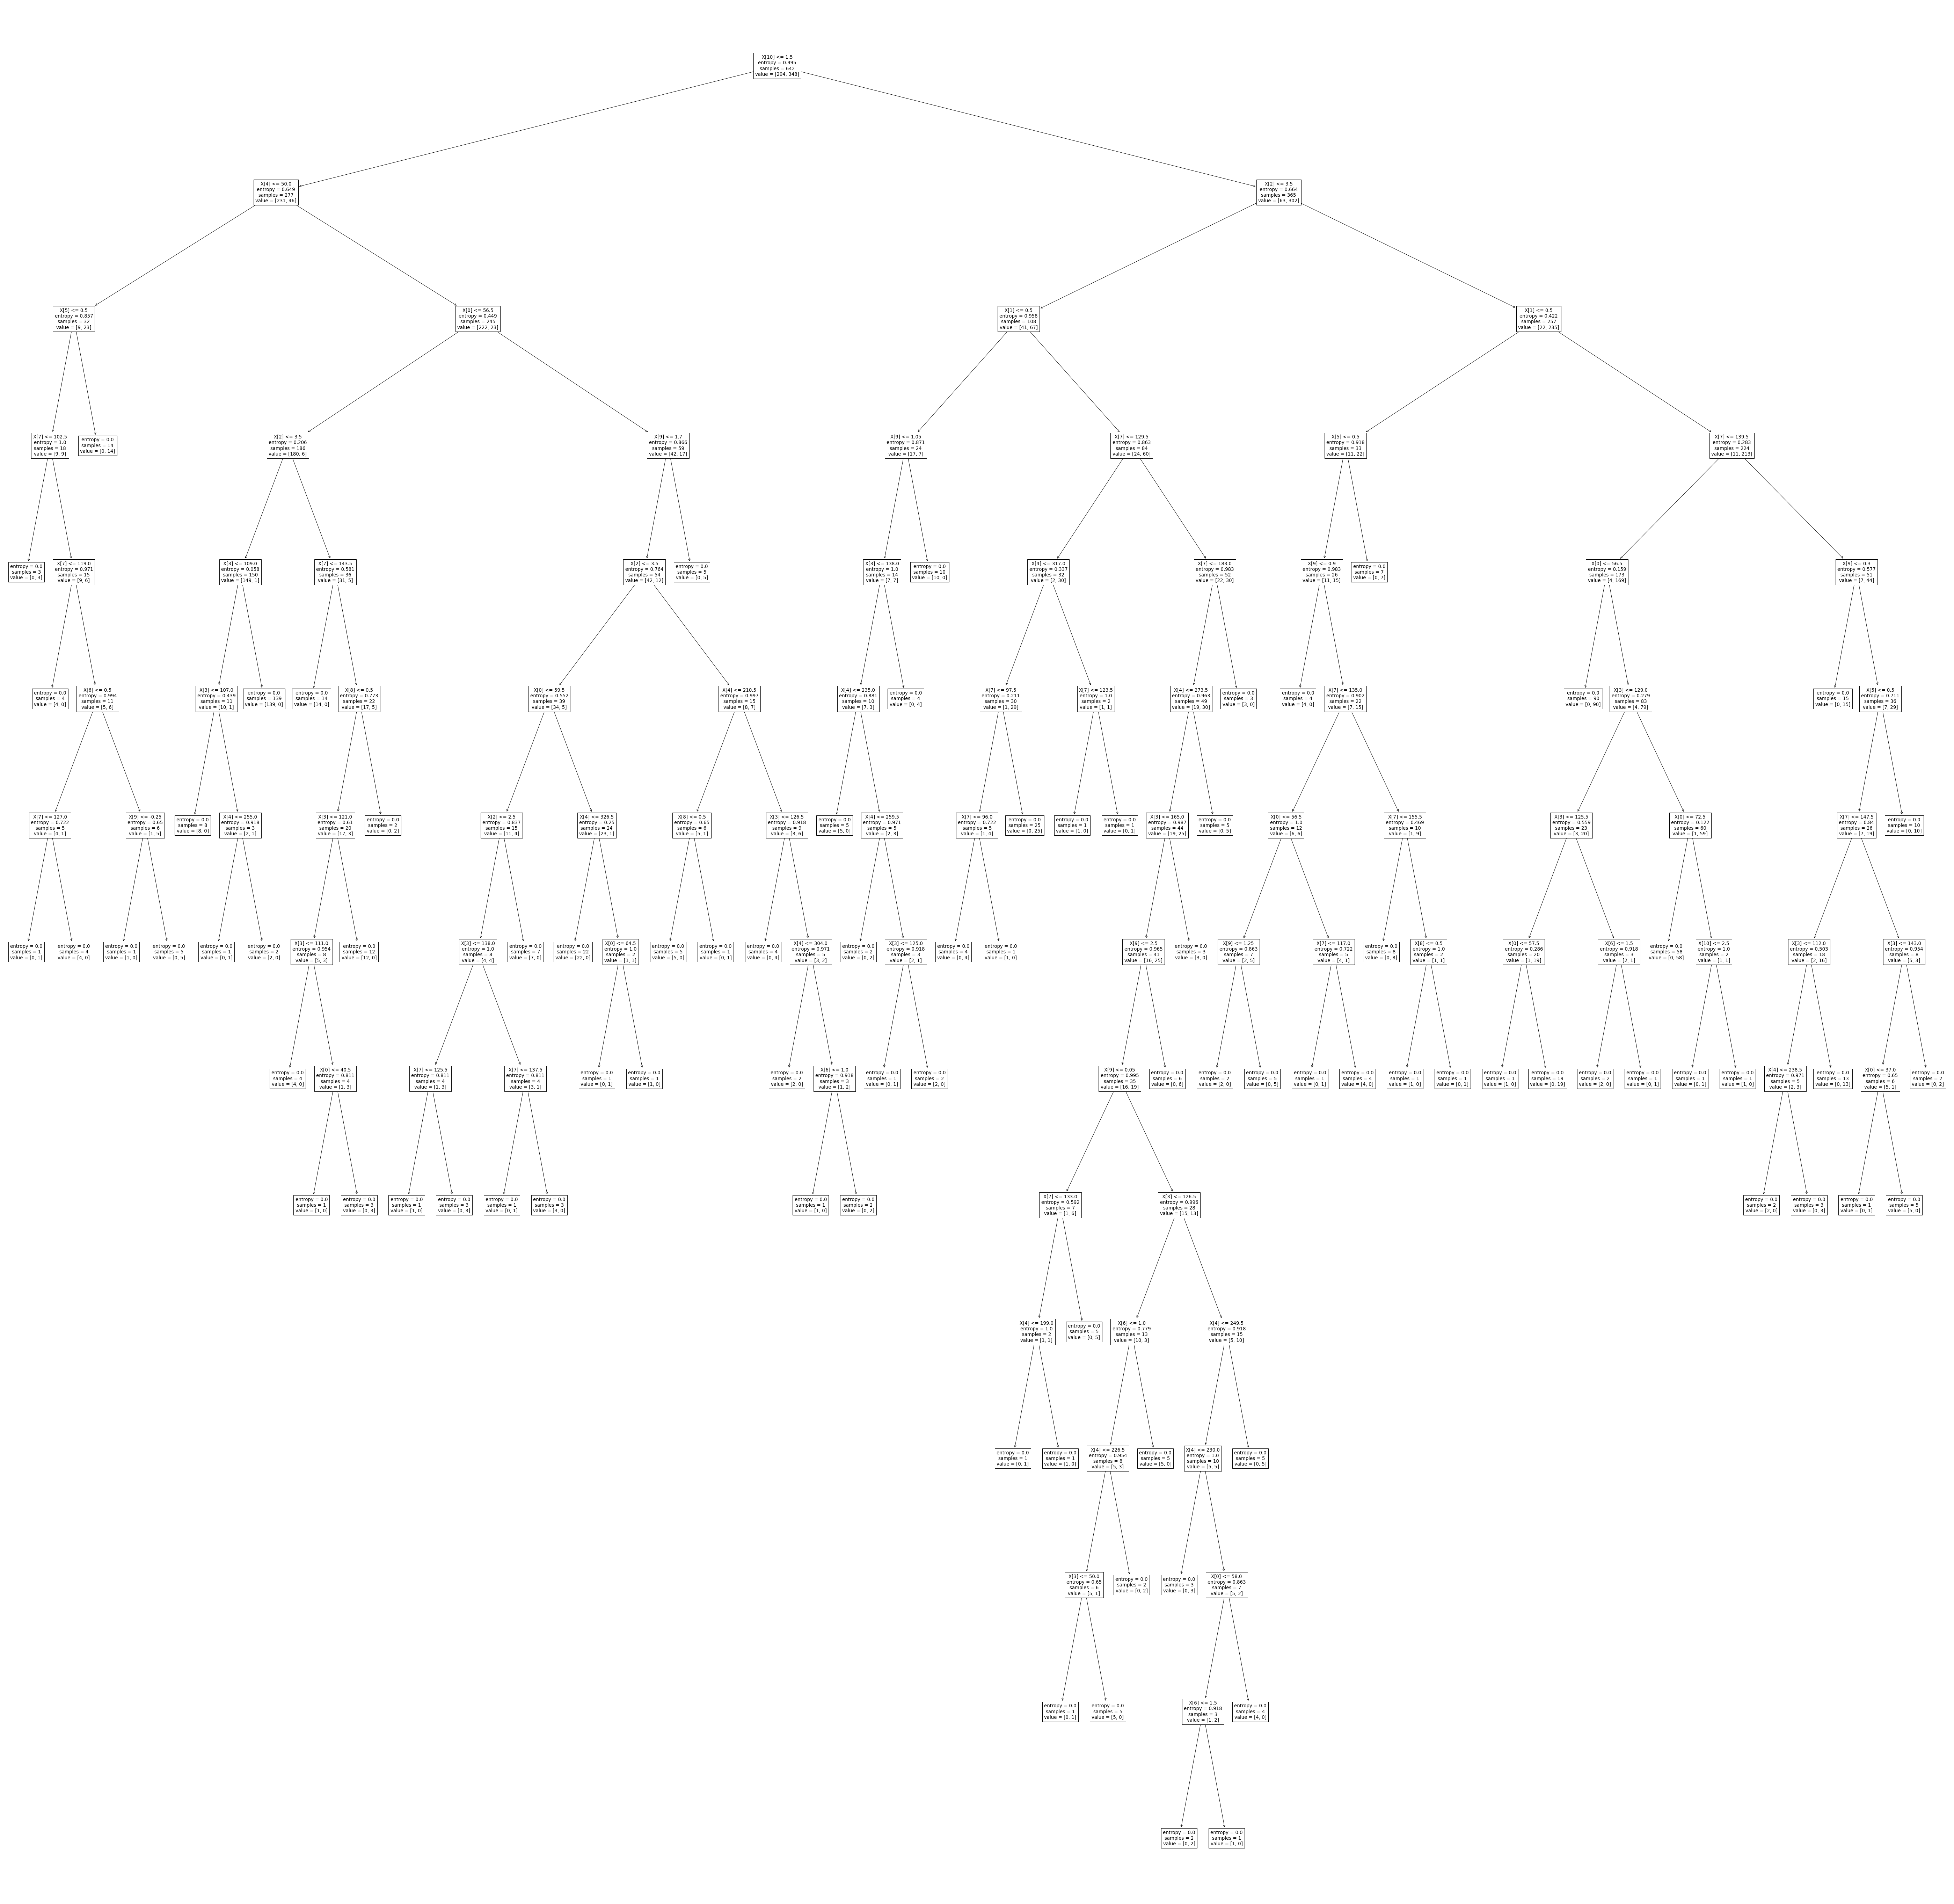

In [51]:
plt.figure(figsize=(100, 100))

tree.plot_tree(dtree.fit(X_train, y_train)) 

# Αξιολόγηση μοντέλου  που δημιουργήθηκε με επιβλεπώμενη μάθηση

Η μεταβλητή `y_test` περιέχει τις τιμές εξόδου από το σύνολο δεδομένων ελέγχου `test` και η μεταβλητή `y_pred` το διάνυσμα με τις εξόδους του μοντέλου με είσοδο το διάνυσμα `y_test`
<br>
<br>


## Μετρική Επίδοσης μοντέλων κατηγοριοποίησης

Ένα μοντέλο κατηγοριοποίησης μπορεί να δώσει:
- Αληθινές Θετικές Προβλέψεις (Τrue Positive – TP) Σωστή πρόβλεψη για θετική κατηγορία 
- Αληθινές Αρνητικές Προβλέψεις (True Negative – TN) Σωστή πρόβλεψη για αρνητική κατηγορία 
- Ψευδείς Θετικές Προβλέψεις (False Positive – FP) Λανθασμένη πρόβλεψη για θετική κατηγορία ενώ η πραγματική κατηγορία είναι αρνητική 
- Ψευδείς Αρνητικές Προβλέψεις (False Negative – FN) Λανθασμένη πρόβλεψη για αρνητική  κατηγορία ενώ η πραγματική κατηγορία είναι θετική 


## accuracy_score
Tο ποσοστό των δειγμάτων που το μοντέλο προέβλεψε σωστά <br>
`(tp +tn)/ (tp + fp + tn + fn)`

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7644927536231884

## Πίνακας Σύγχυσης 


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 83,  33],
       [ 32, 128]], dtype=int64)

## Precision
Η Aκρίβεια (Precision) είναι ο λόγος <br>
`tp / (tp + fp)` <br>
όπου tp είναι ο αριθμός των πραγματικών θετικών και fp ο αριθμός των ψευδών θετικών. Η ακρίβεια είναι διαισθητικά η ικανότητα του ταξινομητή να μην χαρακτηρίζει ως θετικό δείγμα που είναι αρνητικό.

Η καλύτερη τιμή είναι 1 και η χειρότερη τιμή είναι 0.

In [54]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7950310559006211

## Recall

Η ανάκληση είναι ο λόγος <br>
`tp / (tp + fn)` <br> όπου tp είναι ο αριθμός των πραγματικών θετικών και fn ο αριθμός των ψευδών αρνητικών. Η ανάκληση είναι διαισθητικά η ικανότητα του ταξινομητή να βρει όλα τα θετικά δείγματα.

Η καλύτερη τιμή είναι 1 και η χειρότερη τιμή είναι 0.

#### Το recall είναι το πιο σημαντίκο στατιστικό στοιχείο για να συγκρίνουμε τα δυο μοντέλα αφού η εύρεσει όλων των θετικών δειγμάτων είναι και ο σκοπός του προβλήματος, θέλουμε να μπορούμε να πούμε στο πιθανό ασθένη αν νοσή .

In [55]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred) 

0.8

## F1_score
Η  μετρική F1_score μπορεί να ερμηνευτεί ως ένας σταθμισμένος μέσος όρος ακρίβειας (Precision) και ανάκλησης (Recall), όπου ένα F1_score φτάνει την καλύτερη τιμή του στο 1 και το χειρότερο  στο 0. Η σχετική συμβολή της ακρίβειας και της ανάκλησης στο F1_score είναι ίση. Ο τύπος για τη βαθμολογία F1 είναι:

F1 = 2 * (precision * recall) / (precision + recall)

Στην περίπτωση πολλαπλών κατηγοριών και πολλαπλών ετικετών, αυτός είναι ο σταθμισμένος μέσος όρος της βαθμολογίας F1 κάθε κατηγορίας.

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


0.7975077881619939

## classification_report
Δημιουργεί μια αναφορά σε μορφή κειμένου που να δείχνει τις κύριες μετρικές ταξινόμησης

In [57]:
from sklearn.metrics import classification_report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       116
           1       0.80      0.80      0.80       160

    accuracy                           0.76       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.76      0.76      0.76       276



<br>
<br>
<br>

# Εκπαίδευση μοντέλου κατηγοριοποίησης  knn

Στη βιβλιοθήκη **scikit-learn**, ένα μοντέλο (estimator-εκτιμητής) για ταξινόμηση (classification) είναι ένα αντικείμενο της Python που εφαρμόζει τις μεθόδους
- `fit(X, y)` για την εκπαίδευση του μοντέλου για δεδομένα εκπαίδευσης εισόδου `Χ` και εξόδου `y` (εδώ X_train, y_train)
- `predict(y_test)` για χρήση του εκπαιδευμένου μοντέλου για ταξινόμηση με είσοδο δεδομένα ελέγχου (y_test) που δεν χρησιμοποιήθηκαν στην εκπαίδευση του μοντέλου

Ακολουθούν τα βήματα που ακολουθούνται για την ανάπτυξη μοντέλων μηχανικής μάθησης

### 1. Εισαγωγή βιβλιοθήκης οικογένειας αλγορίθμων knn
(Εισαγωγή κλάσης από τη βιβλιοθήκη scikit-learn)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

### 2. Ορισμός μοντέλου, επιλογή συγκεκριμένου αλγόριθμου μάθησης και παραμέτρων (hyperparameters)
(Δημιουργία αντικειμένου ως στιγμιότυπο της κλάσης)

##### Εύρεση της καλήτερης τιμής του k

Αριθμός γειτόνων K = 1     Ακρίβεια:  0.638
Αριθμός γειτόνων K = 2     Ακρίβεια:  0.616
Αριθμός γειτόνων K = 3     Ακρίβεια:  0.674
Αριθμός γειτόνων K = 4     Ακρίβεια:  0.681
Αριθμός γειτόνων K = 5     Ακρίβεια:  0.703
Αριθμός γειτόνων K = 6     Ακρίβεια:  0.67
Αριθμός γειτόνων K = 7     Ακρίβεια:  0.699
Αριθμός γειτόνων K = 8     Ακρίβεια:  0.688
Αριθμός γειτόνων K = 9     Ακρίβεια:  0.71
Αριθμός γειτόνων K = 10     Ακρίβεια:  0.717
Αριθμός γειτόνων K = 11     Ακρίβεια:  0.732
Αριθμός γειτόνων K = 12     Ακρίβεια:  0.714
Αριθμός γειτόνων K = 13     Ακρίβεια:  0.739
Αριθμός γειτόνων K = 14     Ακρίβεια:  0.707
Αριθμός γειτόνων K = 15     Ακρίβεια:  0.739
Αριθμός γειτόνων K = 16     Ακρίβεια:  0.714
Αριθμός γειτόνων K = 17     Ακρίβεια:  0.721
Αριθμός γειτόνων K = 18     Ακρίβεια:  0.714
Αριθμός γειτόνων K = 19     Ακρίβεια:  0.736
Αριθμός γειτόνων K = 20     Ακρίβεια:  0.728

H καλύτερη επίδοση είναι  0.7391304347826086 για Κ= 13


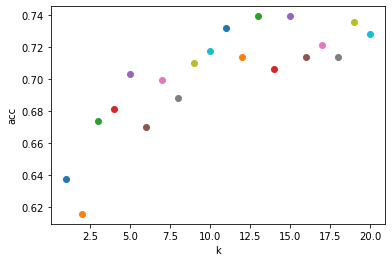

In [59]:
epidosiModelou=[]
for k in range(1,21):
  knnClass = KNeighborsClassifier(n_neighbors=k)
  knnClass.fit(X_train, y_train)
  pred = knnClass.predict(X_test)
  score = accuracy_score(y_test, pred)
  epidosiModelou.append(score)
  print("Αριθμός γειτόνων K =",k,"    Ακρίβεια: ",round(score,3))
  plt.plot(k,score,ls ='', marker='o')
  plt.xlabel('k')
  plt.ylabel('acc')  
print()
print("H καλύτερη επίδοση είναι ",max(epidosiModelou),"για Κ=",epidosiModelou.index(max(epidosiModelou))+1)


Χρήση της τιμής k που μας δίνει την μεγαλύτερη τιμη accuracy όπως βρέθηκε παραπάνω
#### Αρά k = 13 

In [83]:
knnClass = KNeighborsClassifier(n_neighbors=13)

### 3. Εκπαίδευση μοντέλου

In [84]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

### 4. Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου


Έξοδος εκπαιδευμένου μοντέλου με είσοδο τα δεδομένα ελέγχου (test)

In [85]:
y_pred1 = knnClass.predict(X_test)

In [86]:
type(y_pred)

numpy.ndarray

## accuracy_score
Tο ποσοστό των δειγμάτων που το μοντέλο προέβλεψε σωστά <br>
`(tp +tn)/ (tp + fp + tn + fn)`

In [87]:
accuracy_score(y_test, y_pred)

0.7391304347826086

## Πίνακας Σύγχυσης 


In [88]:
confusion_matrix(y_test, y_pred)

array([[ 80,  36],
       [ 36, 124]], dtype=int64)

## Precision
Η Aκρίβεια (Precision) είναι ο λόγος <br>
`tp / (tp + fp)` <br>
όπου tp είναι ο αριθμός των πραγματικών θετικών και fp ο αριθμός των ψευδών θετικών. Η ακρίβεια είναι διαισθητικά η ικανότητα του ταξινομητή να μην χαρακτηρίζει ως θετικό δείγμα που είναι αρνητικό.

Η καλύτερη τιμή είναι 1 και η χειρότερη τιμή είναι 0.

In [89]:
precision_score(y_test, y_pred)

0.775

## Recall

Η ανάκληση είναι ο λόγος <br>
`tp / (tp + fn)` <br> όπου tp είναι ο αριθμός των πραγματικών θετικών και fn ο αριθμός των ψευδών αρνητικών. Η ανάκληση είναι διαισθητικά η ικανότητα του ταξινομητή να βρει όλα τα θετικά δείγματα.

Η καλύτερη τιμή είναι 1 και η χειρότερη τιμή είναι 0.
#### Το recall είναι το πιο σημαντίκο στατιστικό στοιχείο για να συγκρίνουμε τα δυο μοντέλα αφού η εύρεσει όλων των θετικών δειγμάτων είναι και ο σκοπός του προβλήματος, θέλουμε να μπορούμε να πούμε στο πιθανό ασθένη αν νοσή. 

In [90]:
recall_score(y_test, y_pred) 

0.775

## F1_score
Η  μετρική F1_score μπορεί να ερμηνευτεί ως ένας σταθμισμένος μέσος όρος ακρίβειας (Precision) και ανάκλησης (Recall), όπου ένα F1_score φτάνει την καλύτερη τιμή του στο 1 και το χειρότερο  στο 0. Η σχετική συμβολή της ακρίβειας και της ανάκλησης στο F1_score είναι ίση. Ο τύπος για τη βαθμολογία F1 είναι:

F1 = 2 * (precision * recall) / (precision + recall)

Στην περίπτωση πολλαπλών κατηγοριών και πολλαπλών ετικετών, αυτός είναι ο σταθμισμένος μέσος όρος της βαθμολογίας F1 κάθε κατηγορίας.

In [91]:
f1_score(y_test, y_pred)


0.775

## classification_report
Δημιουργεί μια αναφορά σε μορφή κειμένου που να δείχνει τις κύριες μετρικές ταξινόμησης

In [92]:
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       116
           1       0.78      0.78      0.78       160

    accuracy                           0.74       276
   macro avg       0.73      0.73      0.73       276
weighted avg       0.74      0.74      0.74       276



#### Το recall είναι το πιο σημαντίκο στατιστικό στοιχείο για να συγκρίνουμε τα δυο μοντέλα ταξηνόμησης αφού η ευρέσει όλων των θετικών δειγμάτων είναι και ο σκοπός του προβλήματος, θέλουμε να μπορούμε να πούμε στο πιθανό ασθένη αν νοσή. 

   Για το μοντέλο DT Decision Tree χρήσημοποιήσαμε το κριτήριο entropy,information gain, δηλαδή κέρδος της πληροφορίας που βασίζεται στην εντροπία της πληροφορίας,η στρατηγική διαχωρισμού κόμβου είναι η καλύτερη δυνατή αντι της τυχαίας επίσυς δεν έχουμε ορίσει μέγιστο βάθος.Για DT έχουμε recall =0.8 και για το μοντέλο knn για k = 13 έχουμε recall =0.775 άρα καλύτερο μοντέλο είναι το DT όμως η διαφορά μεταξύ των recall για τα δυο μοντέλα είναι αρκετά μικρή ώστε και τα δυο να είναι ικανοποίητικα. Ο σκοπός του προβλήματος δηλαδή της προβλέψεις καρδιαγγιακών ασθενείων παρόλο της πληθώρας των δεδομένων γίνεται με σχετικά μικρό βαθμό περίπου στο 70 % αύτο μας υποδεικνύει ότι η χρήση επαγγέλματικής γνωμάτεύσεις,δηλαδή γιατρού θα είναι πάντα απαραίτητη.Δεδομένα που θα βελτίωναν την επιτύχία των μοντέλων θα ήταν οικογενείακά ιστορικά των ασθενών,βάρος,παχύσαρκεία σε μικρή ηλικία και αποτέλεσματα από υπερυχόγραφήματα κτλ.           

### ΤΕΛΟΣ 